In [1]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
mu.update('collocations', overwrite=True)
from collocations import urn_coll, collocation
from numpy import log

Updated file `C:\Users\larsj\Documents\GitHub\HeCore\collocations.py`

In [2]:
import pandas as pd

In [3]:

from matplotlib import colors

cmap = "Blues"

inspect = lambda harry, w: harry.loc[w]

def check(word, frames):
    return {c:inspect(frames[c]['score'], word) for c in frames if word in frames[c].index}

def dist(obs_mean, expected, freq):
    factor = ((freq-1)/(freq))*obs_mean
    ratio = obs_mean/(obs_mean - factor)
    return obs_mean + (expected - obs_mean)/ratio


def create_frame(coll, expected):
    df = nb.frame(nb.frame(coll).transpose(), 'freq doc dist'.split())
    df['score'] = dist(df['dist'], expected, df['freq'])
    return df

def colls2df(colls, expected):
    colls_df = dict()
    for c in colls:
        colls_df[c] = create_frame(colls[c], expected)
    return colls_df

def calculate_midpoint(before, after):
    if before == 0:
        corr = 1
    elif after == 0:
        corr = -1
    else:
        corr = 0
    return (after - before + corr)/2
    
def make_collocations(word, period=(1945, 1990), step = 3, before = 0, after = 10):
    colls = dict()
    for year in range(period[0], period[1], step):
        print('behandler: ', year, year + step)
        try:
            colls[(year, year + step)] = collocation(word, yearfrom = year, yearto = year + step, corpus='avis', before= before, after = after)
        except:
            # try again - things may have loaded on the server...
            print('prøver en gang til for: ', (year, year + step))
            try:
                colls[(year, year + step)] = collocation(word, yearfrom = year, yearto = year + step, corpus='avis', before= before, after = after)
            except:
                print('klarte ikke: ', (year, year + step))
    colls_df = colls2df(colls, calculate_midpoint(before, after))
    return  colls_df, score_df(colls_df)


score_df = lambda df: nb.frame({x:df[x]['score'] for x in df }).transpose()
display_vals = lambda kr_df, word, clip = 0: kr_df[kr_df >= clip].loc[word]

def show_frame(df, colnum = 0,  clip = 0, fillval= 10, cmap = 'Blues', up = True, axis=0, first_row=0, number_of_rows = 20): 
    if up == True:
        cmap = cmap + '_r'
        dfc = df[df >= clip]
    else:
        dfc = df[df <= clip]
    return dfc.sort_values(by = df.columns[colnum], ascending=up)[first_row:first_row + number_of_rows].fillna(fillval).style.background_gradient(cmap=cmap,axis=axis)

In [4]:
def make_scores(word, period=(1965, 1990), before=10, after=10):
    print('Right context:', (0, after))
    df_r, df_right = make_collocations(word, period=period, before=0, after = after)
    print('Left context:', (before, 0))
    df_l, df_left = make_collocations(word, period=period, before=before, after = 0)
    return df_r, df_right, df_l, df_left

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

In [180]:
lesbisk_r, lesbisk_right, lesbisk_l, lesbisk_left = make_scores('lesbisk', period=(1980, 2000), before=15, after=15)

Right context: (0, 15)
behandler:  1980 1983
behandler:  1983 1986
behandler:  1986 1989
behandler:  1989 1992
behandler:  1992 1995
behandler:  1995 1998
behandler:  1998 2001
Left context: (15, 0)
behandler:  1980 1983
behandler:  1983 1986
behandler:  1986 1989
behandler:  1989 1992
behandler:  1992 1995
behandler:  1995 1998
behandler:  1998 2001


In [204]:
lesbisk_l[(1980, 1983)]

,freq,doc,dist,score
!,8.0,8.0,-8.083333,-8.072917
"""",2.0,2.0,-4.500000,-6.250000
#,1.0,1.0,-9.000000,-8.000000
%,1.0,1.0,-3.000000,-8.000000
&,4.0,4.0,-8.833333,-8.625000
',5.0,3.0,-7.333333,-7.466667
(,22.0,19.0,-9.020833,-8.974432
),25.0,21.0,-10.148148,-10.062222
*,9.0,6.0,-7.229167,-7.314815
",",311.0,189.0,-8.017975,-8.017918


In [206]:
pd.concat({p:nb.frame(lesbisk_l[p]) for p in lesbisk_r}, axis=1, sort=False)

1980                                1983         \
                      1983                                1986          
                      freq    doc       dist      score   freq    doc   
!                      8.0    8.0  -8.083333  -8.072917   23.0   20.0   
"                      2.0    2.0  -4.500000  -6.250000    1.0    1.0   
#                      1.0    1.0  -9.000000  -8.000000    1.0    1.0   
%                      1.0    1.0  -3.000000  -8.000000    NaN    NaN   
&                      4.0    4.0  -8.833333  -8.625000    4.0    4.0   
'                      5.0    3.0  -7.333333  -7.466667    8.0    6.0   
(                     22.0   19.0  -9.020833  -8.974432   31.0   27.0   
)                     25.0   21.0 -10.148148 -10.062222   17.0   15.0   
*                      9.0    6.0  -7.229167  -7.314815    5.0    3.0   
,                    311.0  189.0  -8.017975  -8.017918  441.0  253.0   
-                     42.0   31.0  -6.106061  -6.151154   47.0   37.0   
.                    404.0  236.0  -8.190696  -8.190224  576.0  292.0   
.02                    1.0    1.0 -14.000000  -8.000000    1.0    1.0   
/                     30.0   22.0  -7.098990  -7.129024   41.0   32.0   
0                      1.0    1.0  -8.000000  -8.000000    1.0    1.0   
00                     1.0    1.0 -13.000000  -8.000000    1.0    1.0   
000                    1.0    1.0  -7.000000  -8.000000    1.0    1.0   
02                     2.0    2.0 -10.000000  -9.000000    2.0    2.0   
1                      5.0    5.0 -10.500000 -10.000000    6.0    5.0   
1.                     1.0    1.0 -13.000000  -8.000000    5.0    4.0   
12                     1.0    1.0 -13.000000  -8.000000    NaN    NaN   
12.                    1.0    1.0  -6.000000  -8.000000    NaN    NaN   
12.45                  1.0    1.0 -15.000000  -8.000000    NaN    NaN   
13                     1.0    1.0  -6.000000  -8.000000    NaN    NaN   
14.                    1.0    1.0 -11.000000  -8.000000    1.0    1.0   
15.                    4.0    2.0  -9.000000  -8.750000    NaN    NaN   
15.30                  2.0    2.0 -15.000000 -11.500000    NaN    NaN   
153                    1.0    1.0 -12.000000  -8.000000    1.0    1.0   
159                    1.0    1.0  -9.000000  -8.000000    1.0    1.0   
16                     5.0    5.0 -10.625000 -10.100000    1.0    1.0   
...                    ...    ...        ...        ...    ...    ...   
Ørje                   NaN    NaN        NaN        NaN    NaN    NaN   
Øst-Berlin             NaN    NaN        NaN        NaN    NaN    NaN   
Østerrikerne           NaN    NaN        NaN        NaN    NaN    NaN   
Østfoldhallen          NaN    NaN        NaN        NaN    NaN    NaN   
Østlandssendingen      NaN    NaN        NaN        NaN    NaN    NaN   
Østtyske               NaN    NaN        NaN        NaN    NaN    NaN   
Østvedt                NaN    NaN        NaN        NaN    NaN    NaN   
Øvrebø                 NaN    NaN        NaN        NaN    NaN    NaN   
åNSTØTt                NaN    NaN        NaN        NaN    NaN    NaN   
åUM                    NaN    NaN        NaN        NaN    NaN    NaN   
åk                     NaN    NaN        NaN        NaN    NaN    NaN   
åm                     NaN    NaN        NaN        NaN    NaN    NaN   
åpenbart               NaN    NaN        NaN        NaN    NaN    NaN   
åpnes                  NaN    NaN        NaN        NaN    NaN    NaN   
åpningsgudstjeneste    NaN    NaN        NaN        NaN    NaN    NaN   
åpningstale            NaN    NaN        NaN        NaN    NaN    NaN   
årgang                 NaN    NaN        NaN        NaN    NaN    NaN   
åringens               NaN    NaN        NaN        NaN    NaN    NaN   
årsdagen               NaN    NaN        NaN        NaN    NaN    NaN   
åse                    NaN    NaN        NaN        NaN    NaN    NaN   
æren                   NaN    NaN        NaN        NaN    NaN    NaN   
ættede 

In [87]:
sykdom_r, sykdom_right, sykdom_l, sykdom_left = make_scores('sykdom', period=(1950, 2000), before=10, after=10)

Right context: (0, 10)
behandler:  1950 1953
behandler:  1953 1956
behandler:  1956 1959
behandler:  1959 1962
behandler:  1962 1965
behandler:  1965 1968
behandler:  1968 1971
behandler:  1971 1974
behandler:  1974 1977
behandler:  1977 1980
behandler:  1980 1983
behandler:  1983 1986
behandler:  1986 1989
behandler:  1989 1992
behandler:  1992 1995
behandler:  1995 1998
behandler:  1998 2001
Left context: (10, 0)
behandler:  1950 1953
behandler:  1953 1956
behandler:  1956 1959
behandler:  1959 1962
behandler:  1962 1965
behandler:  1965 1968
behandler:  1968 1971
behandler:  1971 1974
behandler:  1974 1977
behandler:  1977 1980
behandler:  1980 1983
behandler:  1983 1986
behandler:  1986 1989
behandler:  1989 1992
behandler:  1992 1995
behandler:  1995 1998
behandler:  1998 2001


In [193]:
show_frame(lesbisk_left, colnum = 6, fillval=-15, up = False, axis = 1, first_row=20)

,1980,1983,1986,1989,1992,1995,1998
,1983,1986,1989,1992,1995,1998,2001
søsteren,-8,-6.5,-6.25,-15,-15,-3.2,-3.2
mollstemt,-15,-15,-15,-15,-15,-15,-3.26316
Scully,-15,-15,-15,-15,-15,-8,-3.33333
Brenda,-15,-15,-15,-15,-15,-15,-3.33333
Norskfødt,-15,-15,-15,-15,-15,-3.33333,-3.33333
bytte,-15,-15,-15,-15,-8,-15,-3.34948
inne,-15,-15,-15,-15,-8.51042,-4.74167,-3.36949
fram,-9.78571,-5.5,-3.15972,-6.34601,-6.5408,-3.06025,-3.37139
inngikk,-15,-15,-15,-15,-15,-3.92857,-3.375


In [88]:
show_frame(sykdom_right, colnum = 4, up = True, axis = 1)

,1950,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998
,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998,2001
e.l.,10,5.5,3.75,4.14,1.75,2.125,2.56667,3.3125,3.83333,2.5,1.94531,3.1,2.8,4.06061,3.1875,4.05556,4.3
tvinges,5.5,10,10,1.75,1.75,5.5,5.5,10,10,10,10,10,5.25,5.6875,5.5,5.5,3.25
sprer,4.94,3.38889,2.06,1.7875,1.84375,3.75,7.5,2.6875,3.14286,6.25,5.1,2.39286,3.82,3.09259,4.21693,4.39368,3.2516
skapte,10,6.27778,4.75,3.96875,1.85,4.9375,2.5,6.125,4.0625,6.72222,7.61111,5.5,3.8,3.53125,4.625,4.78,4.75
bort-,2.94643,2.6142,2.5,2.56142,1.85782,2.21705,2.79499,2.1822,2.10598,2.09661,2.10606,2.58333,2.7,2.56897,2.125,2.15909,2.25
overdras,3.25,5.08333,5.38889,5.29259,1.9,5.25,5.5,10,5.5,10,10,2.2,3.3125,5.5,3.25,10,10
forbigås,10,5.5,10,5.5,1.9,10,10,10,10,4,10,10,10,10,10,10,10
hindret,1.96658,2.08951,2.21524,2.21594,1.97839,3.51576,2.57273,3.86917,4.11966,3.73056,2.95933,3.70707,4.91667,3.32805,2.46288,5.58,4.38889
ou,5.5,5.5,5.5,2.3125,2,10,10,5.5,5.5,3.5,5.5,10,10,5.5,5.5,5.25,10


In [89]:
show_frame(sykdom_left, colnum = 4, fillval = -10, up = False, axis = 1)

,1950,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998
,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998,2001
uhelbredelig,-1.30493,-1.27467,-1.23049,-1.24293,-1.09226,-1.16693,-1.28364,-1.19353,-1.56716,-1.53727,-1.42939,-1.53051,-2.0781,-1.42388,-1.4632,-1.59171,-1.17349
venerisk,-1.18,-1.64973,-1.5625,-1.06923,-1.10227,-1.375,-1.3,-1.9,-1.36928,-1.67188,-1.25,-1.64286,-1.45,-1.5,-2.5,-2.5,-3.25
Parkinsons,-1.75,-1.45,-1.28125,-1.09342,-1.1075,-1.45435,-1.09949,-1.07879,-1.17411,-1.50333,-1.07143,-1.14916,-1.04191,-1.12841,-1.15902,-1.07401,-1.11179
Grunnet,-1.10336,-1.08168,-1.03883,-1.03357,-1.11286,-1.05643,-1.08437,-1.13991,-1.55547,-1.14016,-1.08892,-1.10142,-1.19409,-1.24697,-1.22424,-1.17472,-1.48785
Føllings,-10,-10,-1.64286,-1.2312,-1.11945,-1.07895,-1.42396,-1.23844,-1.29545,-1.4596,-1.225,-1.30645,-1.36022,-1.33528,-1.26078,-1.375,-1.64286
revmatisk,-3.1375,-1.59211,-1.34615,-1.40909,-1.14375,-1.79653,-1.9,-1.45,-1.24,-1.23684,-1.5625,-1.93939,-1.60084,-1.12162,-1.43539,-1.23609,-1.08036
tids,-1.06442,-1.33053,-1.27395,-1.07404,-1.15274,-1.13159,-1.12234,-1.88912,-1.18526,-1.18214,-1.12586,-1.24915,-1.4557,-1.12367,-1.113,-1.10657,-1.1134
epidemisk,-1.31439,-1.31522,-3.80617,-1.19565,-1.15517,-1.825,-2.5,-2.7,-3.0625,-1.9,-1.75,-2,-1.6375,-1.92857,-1.5,-1.69286,-5.5
grunnet,-1.1888,-1.28571,-1.15287,-1.1568,-1.168,-1.11457,-1.11608,-1.1,-1.3157,-1.39159,-1.33259,-1.27186,-1.18069,-1.3035,-1.25618,-1.21634,-1.24801


In [90]:
show_frame(helse_right, colnum = 7, up = True, axis = 1)

,1950,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998
,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998,2001
center,10,10,10,10,2.75,1.29167,1.31818,1.41176,1.31818,2.75,1.58333,6.5,8,10,10,10,10
laus,8,5.5,10,1.875,1.875,3.77778,2.4,2,5.16667,8,8,3.33333,4.5,10,2.4,2.75,5.34286
PLASER,10,10,10,10,10,10,2.92308,2,10,10,10,10,10,10,10,10,10
førlighet,3.5,3.5,3.37778,2.84491,2.74967,3.65789,2.89583,2.12245,2.19067,2.40294,3.10588,3.11111,3,3.04167,2.4,3.85859,2.69231
forlighet,9.77778,8.375,4,8,10,4,5,2.24,2.38074,2.26087,2.75,5.5,10,3.2,4.22222,5,10
Kast,10,10,8,10,10,10,5,2.27273,8,10,10,10,10,10,8,4.8125,8
normal,5.30116,5.32821,5.55742,7.8125,4.53333,4.44898,4.05556,2.28115,2.40915,2.9139,5.27692,5.11111,6.58833,10.3063,8.21875,9.11111,7.38776
sosialsenter,10,10,10,8,3.2,10,8,2.28235,2.26599,2.384,2.42002,2.38626,2.27161,2.5743,2.65594,2.96247,2.27572
tjenesten,7,6.875,10.2,7.66667,3.27778,5.21429,2.99145,2.28322,3.20202,3.4902,3.33926,2.9056,2.48704,3.68783,7.23545,5.27935,7.2125


In [91]:
show_frame(helse_left, colnum = 8, fillval = -10, up = False, axis = 1)

,1950,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998
,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998,2001
sviktende,-1.26032,-1.34055,-1.19685,-1.08106,-1.12369,-1.21122,-1.09145,-1.09771,-1.10211,-1.1147,-1.09802,-1.13077,-1.26979,-1.07776,-1.16732,-1.34049,-1.36006
Tilfredsstillende,-2.75,-4.59722,-4.39394,-4.44792,-2.73874,-1.44087,-1.63148,-1.06704,-1.10305,-3.11964,-1.5,-8,-2.75,-10,-10.9436,-3.33333,-8
sinnets,-1.2529,-1.54265,-1.26159,-1.14779,-1.44187,-1.41784,-2.04351,-1.46508,-1.16478,-1.48375,-1.40954,-1.45723,-1.40632,-1.54348,-1.54815,-1.88889,-1.63426
Sinnets,-2.42424,-1.625,-2.064,-1.39914,-1.1129,-1.33624,-1.27361,-1.35,-1.17273,-1.69667,-1.8125,-1.53846,-2.75,-1.7363,-1.39294,-2.4,-8
tilfredsstillande,-8,-8,-3.33333,-3.25,-1.77778,-2.4,-2.31818,-1.41176,-1.24138,-1.19444,-1.33333,-8,-10,-8,-8,-6.5,-2.85714
God,-1.70121,-1.99452,-2.24713,-1.67065,-1.18749,-1.61801,-1.69228,-1.13621,-1.28862,-1.34419,-1.3117,-4.65745,-4.74363,-2.4405,-2.55567,-2.59255,-1.73091
Tilfredsstillande,-10,-10,-10,-5.25,-10,-8,-3.33333,-1.14583,-1.38889,-3.33333,-10,-10,-10,-10,-10,-10,-10
mental,-4.5,-3.10101,-1.46667,-1.30238,-1.82088,-1.47446,-1.34543,-1.35001,-1.45797,-1.28359,-1.22849,-1.3033,-1.39996,-1.32378,-1.2818,-1.16469,-1.40422
svekket,-1.34643,-1.26037,-1.15781,-1.30408,-1.21509,-1.25669,-1.68973,-2.13377,-1.48796,-2.30219,-1.95839,-2.8105,-1.7,-1.63333,-2.47347,-2.24518,-1.87671


In [92]:
helse_left.loc['.']

1950  1953   -8.777326
1953  1956   -9.027042
1956  1959   -9.111094
1959  1962   -8.939897
1962  1965   -8.965604
1965  1968   -8.843642
1968  1971   -8.767435
1971  1974   -8.407774
1974  1977   -8.654603
1977  1980   -9.066206
1980  1983   -8.792312
1983  1986   -8.963254
1986  1989   -8.978169
1989  1992   -8.968626
1992  1995   -9.144894
1995  1998   -9.195736
1998  2001   -9.193121
Name: ., dtype: float64

In [93]:
helse_right.loc['.']

1950  1953    6.900042
1953  1956    6.889016
1956  1959    7.193645
1959  1962    7.138094
1962  1965    7.116346
1965  1968    7.126379
1968  1971    7.165718
1971  1974    6.564029
1974  1977    6.725658
1977  1980    7.043314
1980  1983    6.976238
1983  1986    6.929782
1986  1989    7.063335
1989  1992    7.480979
1992  1995    7.321790
1995  1998    7.235337
1998  2001    7.274073
Name: ., dtype: float64

In [16]:
helse_right.to_json('helse_right.json')
helse_left.to_json('helse_left.json')
sykdom_right.to_json('sykdom_right.json')
sykdom_left.to_json('sykdome_left.json')

In [5]:
hr = pd.read_json('helse_right.json')
hl = pd.read_json('helse_left.json')
sr = pd.read_json('sykdom_right.json')
sl = pd.read_json('sykdome_left.json')

In [94]:
hragg = helse_right.mean(axis=1)

In [103]:
def analyse_forms(hragg, cutoff):
    if cutoff >= 1:
        hr_forms = {x:select_form(x) for x in hragg[hragg < cutoff].index}
    else:
        hr_forms = {x:select_form(x) for x in hragg[hragg > cutoff].index}

    hr_forms_invert = {cat:[x for x in hr_forms if hr_forms[x] == cat] for cat in hr_forms.values() }

    return hr_forms_invert

In [105]:
analyse_forms(helse_left.mean(axis=1), -4)

{'unknown': ['Annas',
  'Bedre',
  'Dårlig',
  'God',
  'Kosthold',
  'LEGEBOK',
  'Lovetts',
  'Sinnets',
  'Skolebarns',
  'Skoleliv',
  'Sviktende',
  'Tilfredsstillende',
  'andres',
  'ansattes',
  'arbeidernes',
  'barnas',
  'barnets',
  'barns',
  'befolkningens',
  'darlig',
  'dyrenes',
  'dyrs',
  'dårleg',
  'eldres',
  'elevenes',
  'enkeltes',
  'familiens',
  'families',
  'folkets',
  'folks',
  'gamles',
  'kroppens',
  'kvinnens',
  'mannens',
  'manns',
  'medborgernes',
  'medmenneskers',
  'menneskenes',
  'menneskers',
  'menneskets',
  'morens',
  'od',
  'pasientenes',
  'pasientens',
  'presidentens',
  'sinnets',
  'sinnsmessige',
  'uvanleg',
  'Dovenskap',
  'Eisenhowers',
  'Georgs',
  'Naguibs',
  'evneprøve',
  'hodebunnens',
  'hårefs',
  'kardinalens',
  'laegeattest',
  'skipsbefalets',
  'ufseendef',
  'ufseendet',
  'utseendef',
  'Brilioths',
  'Elizabeths',
  'Fettkvalitet',
  'Hårets',
  'Krusjtsjovs',
  'Masque',
  'Strever',
  'Svane',
  'Yrkest

In [68]:
ngrams = dict()
for word in "helse politikk samfunn stat".split():
    ngrams[word] = nb.unigram(word, period = (1970, 2010), media='avis')
    ngrams[word].columns = [word]
    #ngrams[word] = ngrams[word]/punkt[0]

In [69]:
helse_agg = pd.concat([ngrams[w] for w in ngrams], axis = 1)

In [70]:
punkt = nb.unigram(word, period=(1970, 2010), media='avis')

In [64]:
agg = pd.DataFrame([helse_agg[w/punkt[0] for w in helse_agg]).transpose()

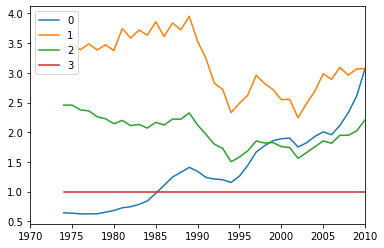

In [67]:
agg.rolling(window=5).mean().plot()

In [56]:
agg

1970    0.638676
1970    3.108475
1970    1.000000
1970    2.326830
1971    3.404459
1971    0.679749
1971    2.556477
1971    1.000000
1972    2.398957
1972    3.440129
1972    0.636641
1972    1.000000
1973    2.447003
1973    3.718929
1973    0.629920
1973    1.000000
1974    2.543616
1974    3.430152
1974    1.000000
1974    0.630057
1975    2.342500
1975    3.428090
1975    0.616248
1975    1.000000
1976    2.138360
1976    2.924149
1976    0.613101
1976    1.000000
1977    2.325948
1977    0.643002
          ...   
2003    1.000000
2003    3.285082
2004    2.203574
2004    1.000000
2004    3.158905
2004    2.006005
2005    1.936015
2005    2.163315
2005    3.356490
2005    1.000000
2006    1.000000
2006    1.669062
2006    2.349701
2006    1.724950
2007    2.147065
2007    3.302640
2007    2.430068
2007    1.000000
2008    1.978588
2008    1.000000
2008    3.121669
2008    2.636406
2009    2.376381
2009    1.000000
2009    3.677485
2009    3.588203
2010    3.393591
2010    4.4729

In [32]:
punkt[0]

1970     6407
1971     5427
1972     5562
1973     6123
1974     6328
1975     7127
1976     6671
1977     6409
1978     6508
1979     6123
1980     6097
1981     5744
1982     6523
1983     6089
1984     5899
1985     5360
1986     5557
1987     5385
1988     6565
1989     5339
1990    15719
1991    15605
1992    14271
1993    13270
1994    12756
1995    11751
1996    10416
1997     9458
1998    13496
1999    12135
2000    11244
2001     9114
2002     9426
2003     7226
2004     6828
2005     6564
2006     7515
2007     4583
2008    19101
2009    16207
2010    12607
Name: 0, dtype: int64

In [71]:
helse = nb.make_graph('helse', cutoff=12)

In [79]:
sykdom = nb.make_graph('sykdom', cutoff=12)

In [72]:
import dhlab.graph_networkx_louvain as gnl

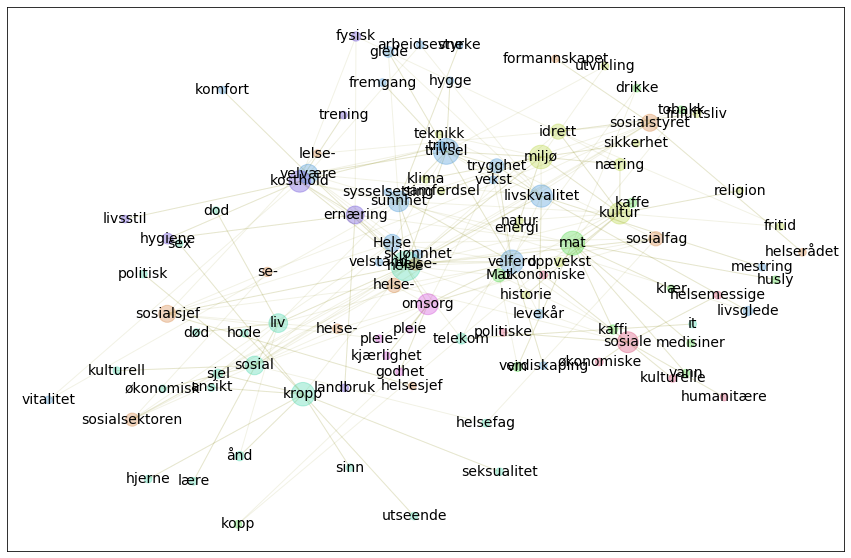

In [77]:
gnl.show_graph(helse, spread=1.8, fontsize=14)

In [78]:
gnl.show_communities(helse)

miljø-kultur :  miljø, kultur, idrett, næring, oppvekst, natur, utvikling, energi, historie, teknikk, samferdsel, fritid, sikkerhet, friluftsliv, religion, klima

mat-Mat :  mat, Mat, vin, kaffe, kaffi, medisiner, drikke, kopp, tobakk, husly, klær, vann

helse-kropp :  helse, kropp, sosial, liv, telekom, sjel, ånd, seksualitet, dod, utseende, ansikt, hjerne, helsefag, økonomisk, sex, lære, sinn, it, politisk, hode, kulturell, død

trivsel-velferd :  trivsel, velferd, livskvalitet, sunnhet, velvære, Helse, trygghet, glede, skjønnhet, levekår, trim, livsglede, komfort, arbeidsevne, styrke, hygge, verdiskaping, mestring, velstand, vekst, fremgang, vitalitet, sysselsetting

kosthold-ernæring :  kosthold, ernæring, hygiene, fysisk, trening, livsstil, landbruk

omsorg-kjærlighet :  omsorg, kjærlighet, pleie, godhet, pleie-

sosiale-politiske :  sosiale, politiske, økonomiske, kulturelle, humanitære, helsemessige, okonomiske

sosialstyret-sosialsjef :  sosialstyret, sosialsjef, sosialfag, hel

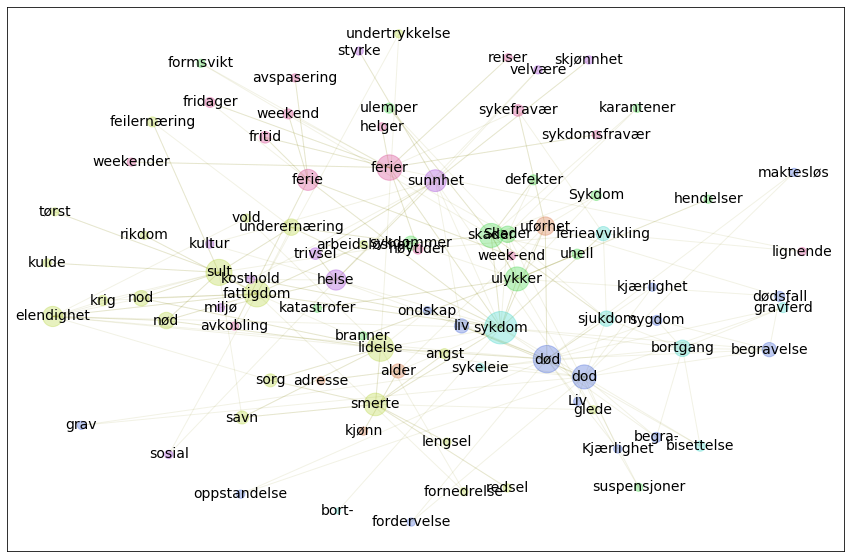

In [81]:
gnl.show_graph(sykdom, spread=1.8, fontsize=14)

In [185]:
lesbe = nb.make_graph('lesbisk', cutoff=18)

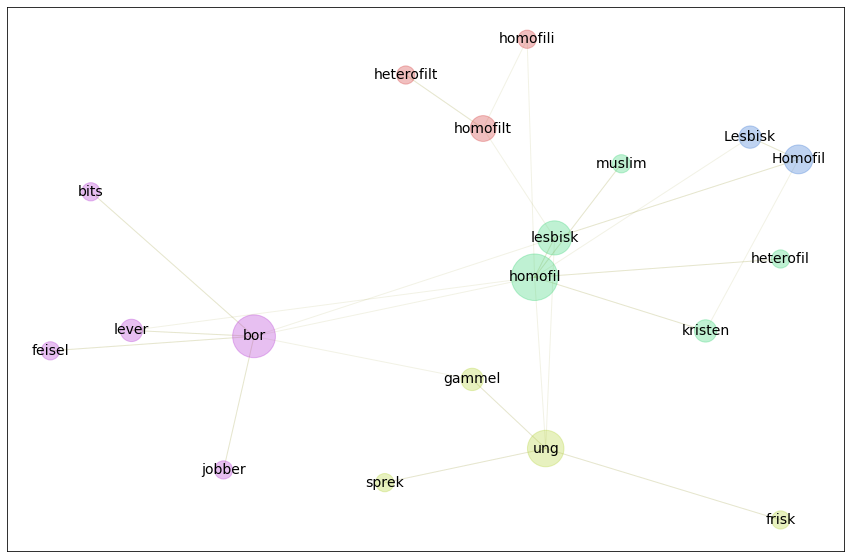

In [186]:
gnl.show_graph(lesbe, spread=1.8, fontsize=14)

In [187]:
gnl.show_communities(lesbe)

ung-gammel :  ung, gammel, sprek, frisk

homofil-lesbisk :  homofil, lesbisk, kristen, muslim, heterofil

Homofil-Lesbisk :  Homofil, Lesbisk

bor-lever :  bor, lever, feisel, jobber, bits

homofilt-heterofilt :  homofilt, heterofilt, homofili



In [82]:
gnl.show_communities(sykdom)

lidelse-fattigdom :  lidelse, fattigdom, sult, smerte, elendighet, underernæring, nød, nod, sorg, savn, feilernæring, krig, angst, fornedrelse, rikdom, redsel, arbeidsløshet, vold, undertrykkelse, lengsel, kulde, glede, tørst

ulykker-skader :  ulykker, skader, Skader, sykdommer, Sykdom, ulemper, defekter, uhell, suspensjoner, branner, formsvikt, katastrofer, karantener, hendelser

sykdom-bortgang :  sykdom, bortgang, sjukdom, ferieavvikling, begravelse, dødsfall, sygdom, bisettelse, sykeleie, bort-

død-dod :  død, dod, liv, begra-, gravferd, ondskap, Kjærlighet, grav, kjærlighet, Liv, oppstandelse, fordervelse, maktesløs

sunnhet-helse :  sunnhet, helse, trivsel, kosthold, skjønnhet, velvære, styrke, kultur, sosial, miljø

ferier-ferie :  ferier, ferie, sykefravær, fritid, fridager, weekend, høytider, lignende, avkobling, week-end, helger, reiser, avspasering, weekender, sykdomsfravær

uførhet-alder :  uførhet, alder, adresse, kjønn



In [83]:
gnl.show_communities(nb.make_graph('influensa'))

kopper-skåler :  kopper, skåler, glass, sink, tallerkener, asjetter, tallerkner, fat

tuberkulose-meslinger :  tuberkulose, meslinger, diaré, malaria, andre, tyfus, polio, hiv, AIDS, kreft, aids

feber-influensa :  feber, influensa, forkjølelse, hodepine, hoste, forkjolelse, halsonde, utslett, oppkast, smerter, kikhoste, sår, influensa-symptomer, hals, omgangssyke, halsbetennelse, allergi, bihulebetennelse, barnesykdommer, tvinger

vaksine-stamtavle :  vaksine, stamtavle, chip, vet.attest, medisiner, attest, helseattest, ormekur

svineinfluensa-fugleinfluensa :  svineinfluensa, fugleinfluensa, finanskrise, sesonginfluensa

lungebetennelse-bronkitt :  lungebetennelse, bronkitt, forkjølelser, astma, døde, hjernehinnebetennelse

sterk-sunn :  sterk, sunn, stabil, robust, rask, sund, modig, smidig

Forkjølelse-Reumatisme :  Forkjølelse, Reumatisme, Smerter



In [84]:
gnl.show_communities(nb.make_graph('kreft'))

sykdommer-misdannelser :  sykdommer, misdannelser, leukemi, skader, skadedyr, ulykker, plager, testikkelkreft, infeksjoner, underernæring, tilstander, insekter, lidelser, lakselus, parasitter

diabetes-overvekt :  diabetes, overvekt, blodtrykk, revmatisme, høyt, kols, astma, hjerteproblemer, fedme, kolesterol

hjerte--karsykdommer :  hjerte-, karsykdommer, karlidelser, hjerte, lungesykdommer, Hjerte-, karsykdom, psykiske

kosthold-røyking :  kosthold, røyking, Kosthold, helse, ernæring, trening, Helse, alkohol, livsstil, trim, aktivitet, matvaner, drikking, fysisk, mosjon, hygiene, snusing

hjerteinfarkt-lungekreft :  hjerteinfarkt, lungekreft, brystkreft, hjerneslag, stress, døde, strupekreft, livmorhalskreft, slag, blodpropp, kollapser, angina, prostatakreft

kreft-hjertesykdommer :  kreft, hjertesykdommer, hjertesykdom, infeksjonssykdommer, indremedisin, blodsykdommer, hjerte-karsykdommer, hjertekarsykdommer, lunge-, celleforandringer, kvinnehelse, kreftbehandling, mobilbruk, kortti

In [85]:
gnl.show_cliques(nb.make_graph('kreft'))

(3, 1) helse, revmatisme, høyt, kreft, hjerte, hjerte-karsykdommer, alkohol, røyking, leukemi, andre, hiv, hjertekarsykdommer, snus, karsykdom, karsykdommer, hjerteinfarkt, karlidelser, malaria, hjertesykdom, diabetes, hepatitt, strupekreft, lungekreft, aids, kosthold, hjertesykdommer, hjerte-, blodtrykk, AIDS, tuberkulose, brystkreft, overvekt, HIV, tobakk, psykiske, kolesterol

(3, 2) kreft, misdannelser, skader, sykdommer

(4, 1) kosthold, andre, hjertesykdommer, diabetes, blodtrykk, kreft, overvekt, lungekreft, hjerteinfarkt, røyking

(4, 2) andre, AIDS, tuberkulose, kreft, aids

(4, 3) diabetes, hjerte-, kreft, karsykdommer



In [106]:
gnl.community_dict(helse)

{'miljø-kultur': ['miljø',
  'kultur',
  'idrett',
  'næring',
  'oppvekst',
  'natur',
  'utvikling',
  'energi',
  'historie',
  'teknikk',
  'samferdsel',
  'fritid',
  'sikkerhet',
  'friluftsliv',
  'religion',
  'klima'],
 'mat-Mat': ['mat',
  'Mat',
  'vin',
  'kaffe',
  'kaffi',
  'medisiner',
  'drikke',
  'kopp',
  'tobakk',
  'husly',
  'klær',
  'vann'],
 'helse-kropp': ['helse',
  'kropp',
  'sosial',
  'liv',
  'telekom',
  'sjel',
  'ånd',
  'seksualitet',
  'dod',
  'utseende',
  'ansikt',
  'hjerne',
  'helsefag',
  'økonomisk',
  'sex',
  'lære',
  'sinn',
  'it',
  'politisk',
  'hode',
  'kulturell',
  'død'],
 'trivsel-velferd': ['trivsel',
  'velferd',
  'livskvalitet',
  'sunnhet',
  'velvære',
  'Helse',
  'trygghet',
  'glede',
  'skjønnhet',
  'levekår',
  'trim',
  'livsglede',
  'komfort',
  'arbeidsevne',
  'styrke',
  'hygge',
  'verdiskaping',
  'mestring',
  'velstand',
  'vekst',
  'fremgang',
  'vitalitet',
  'sysselsetting'],
 'kosthold-ernæring': ['k

In [107]:
helse_community =  gnl.community_dict(helse)

In [142]:
from IPython.display import HTML

In [178]:
helse_cluster = dict()
for cluster in helse_community:
    helse_cluster[cluster] = helse_right.loc[helse_community[cluster]].fillna(10).mean()
helse_cluster_time = pd.DataFrame.from_dict(helse_cluster, orient='index')

In [179]:
helse_cluster_time.style.background_gradient(cmap="Blues_r", axis=1)

,1950,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998
,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998,2001
helse-kropp,8.23021,8.18504,8.06635,7.86443,8.45657,8.25475,8.3308,8.43706,8.23005,8.36143,8.23257,8.11819,7.93441,7.15835,7.79673,7.73201,7.93308
kosthold-ernæring,7.34439,7.70269,6.76932,6.18383,5.78588,7.25126,5.17474,6.61003,5.47012,5.68605,4.93411,5.60596,6.16984,5.42343,5.50591,5.62708,5.84986
mat-Mat,8.6419,8.97408,8.58969,8.51928,8.52624,8.38181,9.21741,9.12412,8.42434,8.19388,8.77138,8.64418,8.99748,8.8736,9.79474,8.52962,8.24099
miljø-kultur,7.94043,7.16964,7.71452,8.55747,7.54109,7.82803,7.03891,7.91098,6.64108,7.3456,7.06658,5.97968,6.51328,6.4988,6.44317,6.607,6.06933
omsorg-kjærlighet,8.86451,9.21587,9.25419,8.70972,8.20575,7.68728,9.4488,8.97865,8.45714,8.47364,7.70259,7.57459,7.74096,7.0954,6.21072,6.74444,6.67439
sosiale-politiske,8.95214,9.0674,9.21643,8.26531,7.99391,8.13221,8.37555,8.42649,7.70327,8.40462,7.73193,9.10491,9.24363,6.61293,7.17121,8.45621,9.20482
sosialstyret-sosialsjef,9.66667,9.60938,9.875,9.69815,9.38024,9.18854,8.69759,7.99629,7.96815,7.83465,7.16076,7.18055,7.26172,7.05811,7.10934,7.01867,7.1771
trivsel-velferd,6.1975,6.63736,6.0302,6.45141,6.33402,6.04828,6.09991,6.28881,6.18238,6.61431,6.21321,6.02622,6.31189,6.29606,5.89104,5.80173,6.04173


In [188]:
lesbe_community = gnl.community_dict(lesbe)
lesbe_cluster = dict()
for cluster in lesbe_community:
    lesbe_cluster[cluster] = helse_right.loc[lesbe_community[cluster]].fillna(10).mean()
lesbe_cluster_time = pd.DataFrame.from_dict(lesbe_cluster, orient='index')

C:\Users\larsj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.


In [189]:
lesbe_cluster_time.style.background_gradient(cmap="Blues_r", axis=1)

,1950,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998
,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998,2001
Homofil-Lesbisk,10,10,10,10,10,10,10,10,10,10,10,9,9,10,10,10,10
bor-lever,9.41952,9.38283,8.99215,9.56605,9.09502,9.36059,9.5491,9.43775,9.51482,9.91097,9.10488,9.41753,9.35555,9.33943,8.83306,9.37034,8.51799
homofil-lesbisk,10,10,9.6,10.0444,9.70208,10.3,9.6,9.95,9.7,9.65,9.81389,9.91837,9.77143,9.8,9.6,9.1,9.2
homofilt-heterofilt,10,10,10,10,10,10,10,10,10,10,10,10,9.33333,10,9.33333,9.33333,9.33333
ung-gammel,8.10877,8.89045,8.59234,8.9575,8.91607,9.37507,7.75049,8.41639,8.45372,7.7133,7.90625,7.61783,6.90392,9.70702,9.0872,8.80463,9.11873


In [164]:
body = ""
for cluster in helse_community:
    
    body += "<h2 style='color:DarkRed'>{c}</h2>".format(c=cluster) + helse_right.loc[helse_community[cluster]].fillna(10).style.background_gradient(cmap="Blues_r", axis=1).render()
css = "<style>td {padding:10px;  border:none;} table {font-family:Arial;}</style>"
html = "{css}{body}".format(css=css, body=body)    

In [165]:
HTML(html)

,1950,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998
,1953,1956,1959,1962,1965,1968,1971,1974,1977,1980,1983,1986,1989,1992,1995,1998,2001
miljø,5.33333,7.75,7.75,12.338,9.77604,7.30357,6.87644,6.09968,3.32115,5.48743,4.43431,3.60344,3.6496,3.0617,2.90226,2.76022,2.77018
kultur,8.32143,5.77778,7.5,7.72222,4.65608,4.07692,4.44444,5.67969,7.15865,6.89031,5.14583,5.51103,6.69903,6.10085,5.67903,5.84123,6.17106
idrett,6.28571,6.33333,4.85,6.5098,7.34414,8.50505,8.175,8.07292,5.73846,7.83385,8.72056,7.40762,6.05347,7.92008,7.84942,6.63641,6.48348
næring,9.45833,5.42857,11.5139,9.5,8,7.25,5,8.66667,7,6.75,7.4375,6.70625,7.57143,7.19811,7.38651,6.64104,7.03037
oppvekst,10,8,10,8,10,10,10,10,4.88889,10,6.25,4.8125,8,6.88,6.95556,7.02841,5.55396
natur,7.25,7,8,12.8571,9.35,7.75,7.63416,6.58939,4.96296,7.41667,4.94444,4.09821,4.86099,5.96949,4.66937,7.62791,8.34343
utvikling,6.01862,6.18469,6.27721,6.40062,7.05677,9.64747,8.33971,8.34708,7.94286,7.83929,6.53573,5.59497,7.3252,8.11783,5.90474,7.01641,6.91531
energi,6.83889,4.82158,6.69231,6.096,5.98946,5.46032,5.50994,8.33333,6.30567,7.61719,8.41667,7.65909,9.25926,7.59615,8.5767,8.15385,6.5298
historie,7.75,8,7.5,10.2222,7.66389,10.0952,9.55556,7.75,8.5625,11.04,7.55556,9.75,9.52778,6.77404,8.35156,9,7.5625


In [166]:
with open('helse_galakse.html', 'w') as f:
    f.write(html)